/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_15367/3970311200.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="1993-04-01")
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume  \
Date                                                                   
2024-08-15  544.755920  545.041539  540.628905  541.239580  60846800   
2024-08-16  545.977295  546.676643  542.973156  543.130725  44430700   
2024-08-19  551.197510  551.197510  545.533948  546.390865  39121800   
2024-08-20  550.301270  552.409114  548.951869  550.744517  33732300   
2024-08-21  552.192383  553.659975  546.390911  551.355185  41514600   

Price           12_ema      27_ema      MACD    Signal  MACD_HIST  Strategy  \
Date                                                                          
2024-08-15  544.755920  544.755920  0.000000  0.000000   0.000000       NaN   
2024-08-16  545.417498  545.389226  0.028273  0.015707   0.012566      -1.0   
2024-08-19  547.673438  547.470439  0.202999  0.092466   0.110533       1.0   
2024-08-20  548.502942  548.258648  0.244294  0.143898   0.100396       1.0   
2024-08-21  549.50535

Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_HIST,Strategy,asset_cum_returns,strategy_cum_returns
Date,,,,,,,,,,,,,
2024-08-15,544.755920,545.041539,540.628905,541.239580,60846800,544.755920,544.755920,0.000000,0.000000,0.000000,NaN,NaN,NaN
2024-08-16,545.977295,546.676643,542.973156,543.130725,44430700,545.417498,545.389226,0.028273,0.015707,0.012566,-1.0,0.002242,-0.002242
2024-08-19,551.197510,551.197510,545.533948,546.390865,39121800,547.673438,547.470439,0.202999,0.092466,0.110533,1.0,0.011825,0.007298
2024-08-20,550.301270,552.409114,548.951869,550.744517,33732300,548.502942,548.258648,0.244294,0.143898,0.100396,1.0,0.010180,0.005660
2024-08-21,552.192383,553.659975,546.390911,551.355185,41514600,549.505350,549.166097,0.339253,0.202012,0.137241,1.0,0.013651,0.009116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-20,671.299988,672.210022,667.270020,667.320007,60493400,665.176515,661.731410,3.445105,4.367217,-0.922111,-1.0,0.232295,-0.154589
2025-10-21,671.289978,672.989990,669.979980,671.440002,56249000,666.117048,662.414165,3.702883,4.234350,-0.531467,-1.0,0.232277,-0.154576
2025-10-22,667.799988,672.000000,663.299988,672.000000,80564000,666.375962,662.798866,3.577095,4.102899,-0.525804,-1.0,0.225870,-0.150181


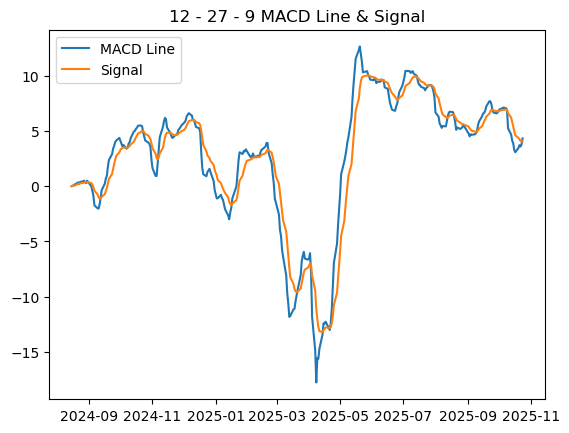

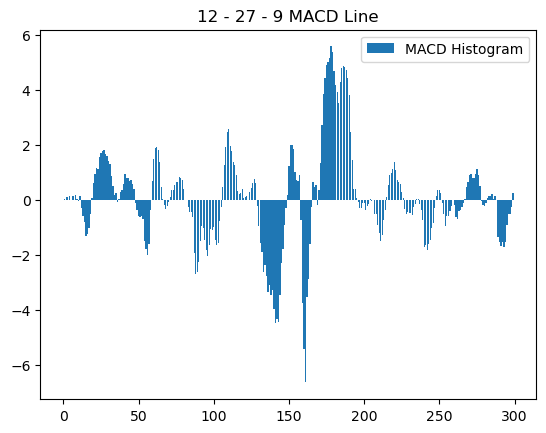

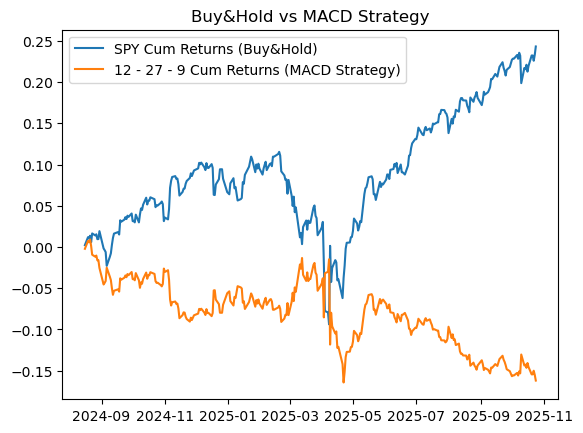

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np # FOR np.where

# MACD Indicator is used to explain Trends. 
# Bullish Momentum: when the signal line crosses above the MACD Line
# Bearish Momentum: when the signal line crosses below the MACD Line

TICKER = "SPY"
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9 # Difference between those two values 
LOOKBACK = 300

def get_data(ticker = TICKER):
    df = yf.download(ticker, start="1993-04-01")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:,:]

def add_MACD(df, fast = MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    # we will be using EMA (Exponential Moving Average from now on, because they are more exact)
        # Step 1: Create Fast and Slow EMA Columns
    df[f"{fast}_ema"] = df["Close"].ewm(span = fast).mean()
    df[f"{slow}_ema"] = df["Close"].ewm(span = slow).mean()

        # Step 2: Create MACD Column (Macd line is the difference between the fast and the slow)
    df[f"MACD"] = df[f"{fast}_ema"] - df[f"{slow}_ema"]

        # Step 3: Create MACD Signal Column (Span here = 9-period) == moving average of this line
    df["Signal"] = df[f"MACD"].ewm(span=span).mean()

        # Step 4: MACD Hist is almost always what is used fin TA
    df["MACD_HIST"] = df[f"MACD"] - df[f"Signal"]

        # Step 5: Plot Functions
    plt.figure()
    plt.plot(df["MACD"]) # Blue
    plt.plot(df["Signal"]) # Orange
        # When MACD (Blue Line) crosses above the Signal (Orange line) == Upwards momentum (Long)
        # When MACD (Blue Line) crosses below the Signal (Orange line) == Downwards momentum (Short)
    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line & Signal")
    plt.legend(["MACD Line", "Signal"])

        # Step 6: Plot Histogram 
    # Histogram Strategy (Crossover == Signal to Enter) - Plot a bar Chart:
        # Previous Version: 
    # plt.bar(x=df.index, height=df["MACD_HIST"])
        # Current Version
    plt.figure()
    plt.bar(x=range(len(df)), height=df["MACD_HIST"])
    # "For every Date in my index, draw a bar equal to that day's Histogram Value 
    # Direction: is the bar positive (above 0 - Bullish) or negative (below 0 - Bearish)?
    # Strength: is the bar tall (strong momentum) or short (weak momentum)?
    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")
    plt.legend(["MACD Histogram"])

    return df

def add_strategy(df): # Column to multiply our Cummulative Returns by
    # df["Strategy"] = 0 # fills all rows with 0
    # Long when Bullish Momentum, Short for Bearish Momentum
    df["Strategy"] = np.where(df["MACD_HIST"] > 0, 1, -1)
    # Shift the signal to prevent lookahead bias - we can only understand Data after it happens:
    df["Strategy"] = df["Strategy"].shift(1)

    return df

# Use Numpy to Calculate Cumulative Returns
# def test_strategy(df, ticker, fast, slow):
#     df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1
#     df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() - 1
#     return df

def test_strategy(df):
    # Buy&Hold vs MACD Strategy
    df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1 
    df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() - 1

    plt.figure()
    plt.plot(df["asset_cum_returns"])
    plt.plot(df["strategy_cum_returns"])
    plt.legend([f"{TICKER} Cum Returns (Buy&Hold)", f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} Cum Returns (MACD Strategy)"])
    plt.title("Buy&Hold vs MACD Strategy")
    # plt.title("MACD Histogram Strategy Returns")
    return df

## Visualizing the Data Set
def main():
    df = get_data()
    df = add_MACD(df)
    df = add_strategy(df)
    df = test_strategy(df)
    print(df.head())

    return df

main()

In [8]:
plt.plot(df["MACD"]) # Blue
plt.plot(df["Signal"]) # Orange

# Histogram Strategy:
# When the blue line crosses above the orange line, that signalizes upwards moemntum 
# And when the blue line crosses below the orange line, that is downwards moemntum 
# A Crossover is usually a signal to enter

plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")

NameError: name 'df' is not defined

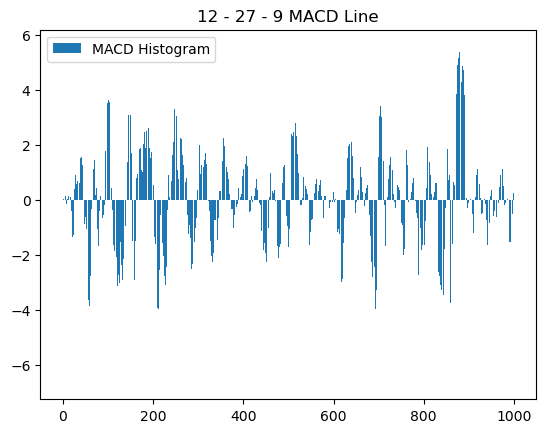

In [ ]:
    plt.bar(x=range(len(df)), height=df["MACD_HIST"])
    # "For every Date in my index, draw a bar equal to that day's Histogram Value 
    # Direction: is the bar positive (above 0 - Bullish) or negative (below 0 - Bearish)?
    # Strength: is the bar tall (strong momentum) or short (weak momentum)?
    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")
    plt.legend(["MACD Histogram"])